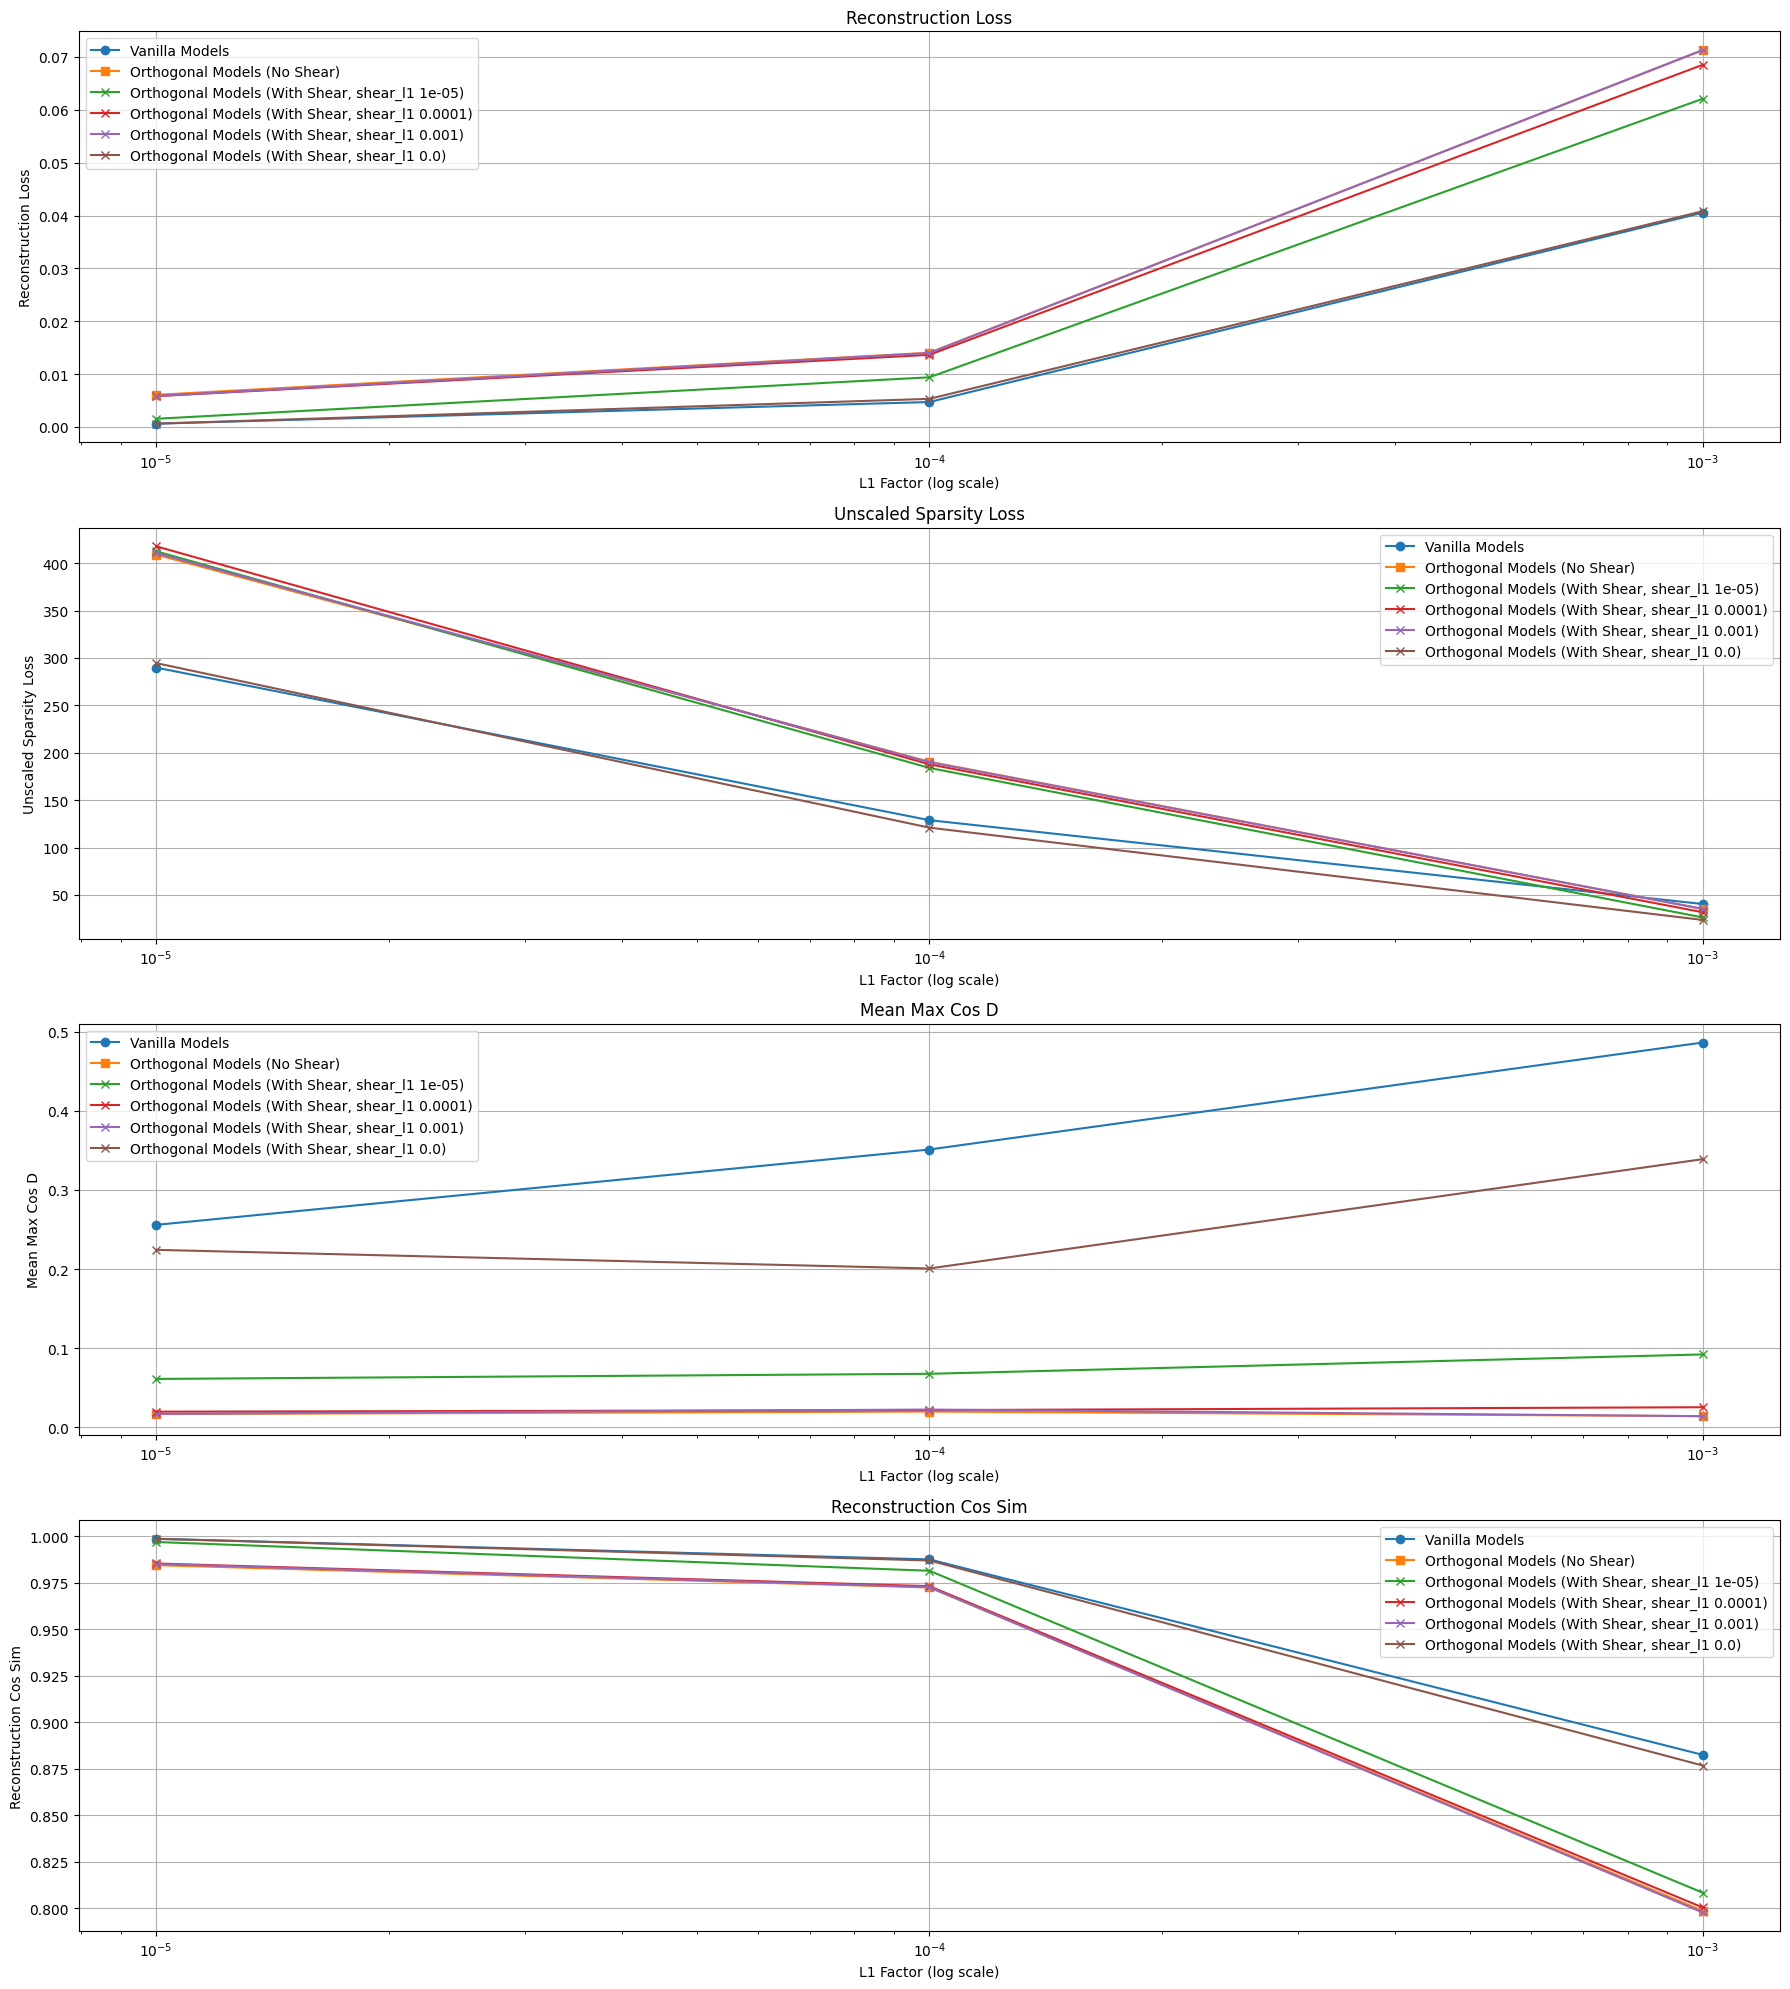

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the experimental results data
file_path = '/Users/hergen/Desktop/UHH/MSc/FS 2/NN/wandb_export_2024-05-29T11_09_11.489+02_00.csv'
data = pd.read_csv(file_path)

# Correct the filtering condition for 'tied'
filtered_data = data[(data['R'] == 2) & (data['tied'] == True)]

# Separate the models
vanilla_models = filtered_data[filtered_data['architecture'] == 'vanilla']
orthogonal_no_shear = filtered_data[(filtered_data['architecture'] == 'orthogonal') & (filtered_data['allow_shear'] == False)]
orthogonal_with_shear = filtered_data[(filtered_data['architecture'] == 'orthogonal') & (filtered_data['allow_shear'] == True)]

# Add 'shear_l1' column to orthogonal_with_shear for classification
if 'shear_l1' not in orthogonal_with_shear.columns:
    orthogonal_with_shear['shear_l1'] = orthogonal_with_shear['l1']

# Plotting function for multiple metrics including reconstruction_cos_sim with log scale for x-axis and all models in one plot, classified by shear_l1
def plot_all_models_multiple_metrics_by_shear_l1_including_cos_sim(vanilla, orthogonal_no_shear, orthogonal_with_shear):
    metrics = [
        'eval/ave_epoch/reconstruction_loss',
        'eval/ave_epoch/unscaled_sparsity_loss',
        'eval/ave_epoch/mean_max_cos_D',
        'eval/ave_epoch/reconstruction_cos_sim'
    ]
    titles = [
        'Reconstruction Loss',
        'Unscaled Sparsity Loss',
        'Mean Max Cos D',
        'Reconstruction Cos Sim'
    ]

    plt.figure(figsize=(18, 20), dpi = 500)
    
    for i, metric in enumerate(metrics):
        plt.subplot(4, 1, i+1)
        plt.plot(vanilla['l1'], vanilla[metric], 'o-', label='Vanilla Models')
        plt.plot(orthogonal_no_shear['l1'], orthogonal_no_shear[metric], 's-', label='Orthogonal Models (No Shear)')
        for shear_l1 in orthogonal_with_shear['shear_l1'].unique():
            shear_filtered = orthogonal_with_shear[orthogonal_with_shear['shear_l1'] == shear_l1]
            plt.plot(shear_filtered['l1'], shear_filtered[metric], 'x-', label=f'Orthogonal Models (With Shear, shear_l1 {shear_l1})')
        
        plt.xscale('log')
        plt.xlabel('L1 Factor (log scale)')
        plt.ylabel(titles[i])
        plt.title(titles[i])
        plt.grid(True)
        plt.legend()
    
    plt.tight_layout()
    plt.show()
    

# Plot all models together including reconstruction_cos_sim
plot_all_models_multiple_metrics_by_shear_l1_including_cos_sim(vanilla_models, orthogonal_no_shear, orthogonal_with_shear)

